In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("incl/")

import ELPH_dyn

import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')
# trajectories = narrom.utils.load_trajectories(filename='../runs_n_kmax=80.npz')


# trajectories = trajectories[::10]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


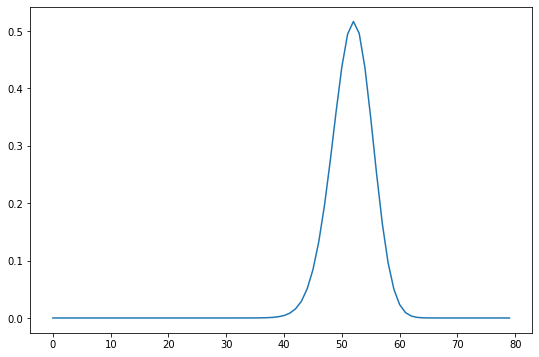

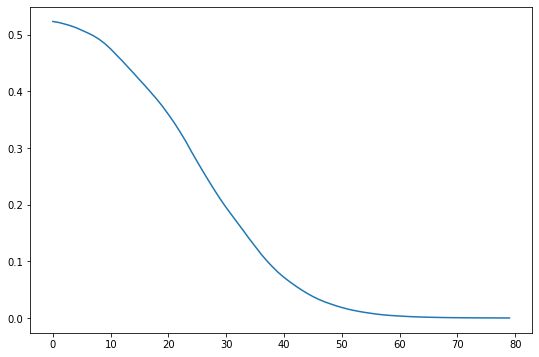

In [3]:
plt.plot(trajectories[1][0])
plt.show()

plt.plot(trajectories[1][-1])
plt.show()

In [44]:
import fermi_fit



dk = 4./n_kmax

get_dispersion = ELPH_dyn.electron_dispersion
get_DOS = ELPH_dyn.electron_DOS

get_k = ELPH_dyn.get_k

ks = get_k(dk,np.arange(n_kmax))
DOS = get_DOS(ks,dk)
ens = get_dispersion(ks)

# print(DOS.shape, ens.shape)


fermi_fitter = fermi_fit.fermi_fit(DOS,ens,ELPH_dyn.kB)

state density:  0.17458257746227737
qmu -249.29148466631392 qTemp 1571610.924053842 steps 25
qfermi density:  0.17458257746228206


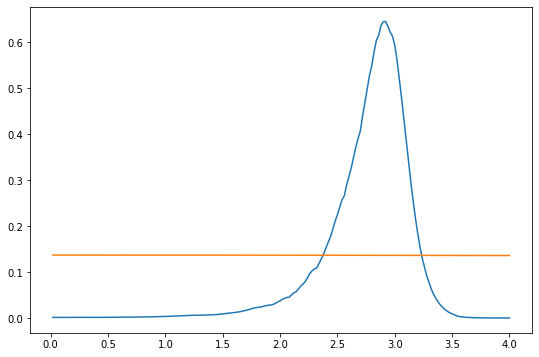

In [78]:

state = trajectories[238][9]

print('state density: ', ELPH_dyn.get_density_from_state(state,dk))


fermi_fitter.STEP_LIMIT = 100
fermi_fitter.dT = 1.
fermi_fitter.dmu = 1e-3

fermi_fitter.mstep_max_init = 0.1
fermi_fitter.Tstep_max_init = 500

mu,Temp,steps = fermi_fitter.fit(state, 0.1, 1500, False)

print('qmu',mu, 'qTemp',Temp,'steps',steps)


qfermi = fermi_fitter.fermi(ens,mu,Temp)

print('qfermi density: ', ELPH_dyn.get_density_from_state(qfermi,dk))

plt.plot(ks,state)
plt.plot(ks,qfermi)
plt.show()


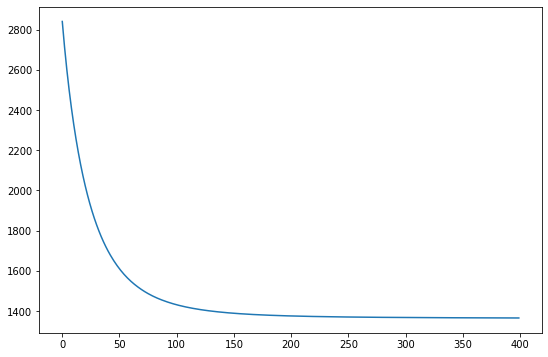

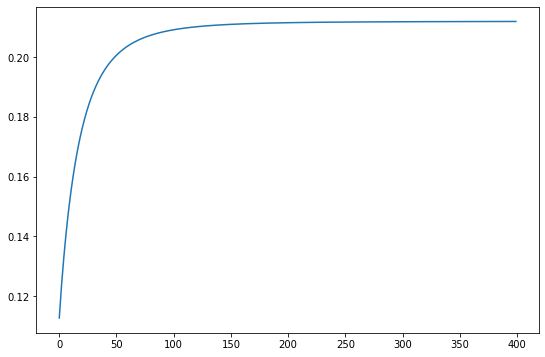

In [33]:
run = trajectories[10]
Temps = []
mus = []


for k in range(run.shape[0]):
    mu,Temp,steps = fermi_fitter.fit(run[k], 0.1, 1000, False)
    mus.append(mu)
    Temps.append(Temp)
    
plt.plot(Temps)
plt.show()

plt.plot(mus)
plt.show()